# The Hunger Data Games

**AI3 Team**:

* Máximo Megías
* José Murillo
* Lluís Navarro-Girbés


## **1** Imports and parsing complete `glass.csv` file from _Kaggle_

In [39]:
# Numerical and Basics
import pandas as pd
import numpy as np
# from sklearn import datasets

# DataViz and Exploratory Data Analysis
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Machine Learning Algorithms and Goodness-Of-Fit Metrics
# from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

## **2** Some Visualizations and Correlation Analysis with Numeric Variables


In [40]:
glass_dataset = pd.read_csv("glass.csv")
glass_dataset.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [41]:
glass_dataset.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [42]:
# Search For Null Params
glass_dataset.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

All variables are numerical even the target type. On the other hand there are not null values.

### 2.1 Descriptive Statistics, Features Importance and Correlation Analysis

First we want to check if the target classes ara unbalanced or not. This is important because we try to take this into account for further analysis and the splitting of the dataset.

/home/devs/DeepLearningFramework/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '# Glass Types')

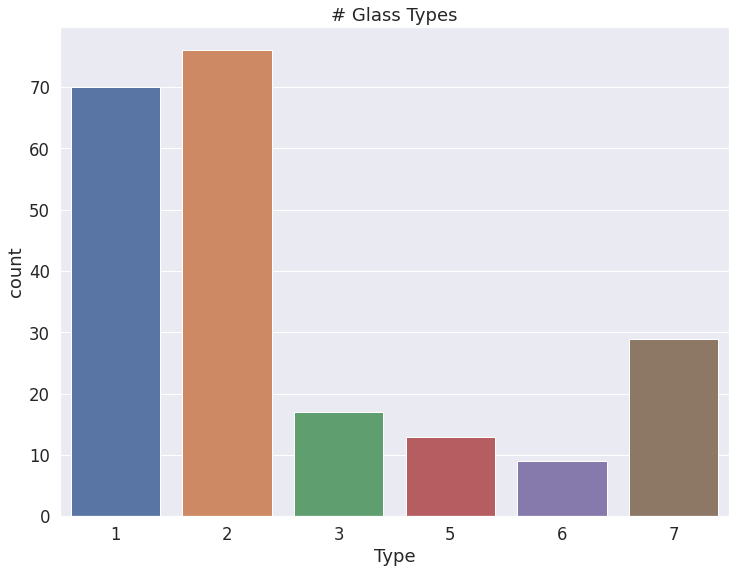

In [43]:
sns.set(style="darkgrid", font_scale=1.5)
plt.subplots(figsize = (12,9))
sns.countplot('Type',data=glass_dataset).set_title('# Glass Types')

Clearly target variables are unbalanced with class 1 and 2 more frequent than the others.

In [44]:
glass_dataset.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

**The columns in this dataset are:**
* First Column, RI: refractive index. 
* Columns 2 to 9. Pure Chemical Elements.
* Column 10: The Type of glass we want to classify


Features are far for being of similar scale. We have to use some normalization using `Scalers`:

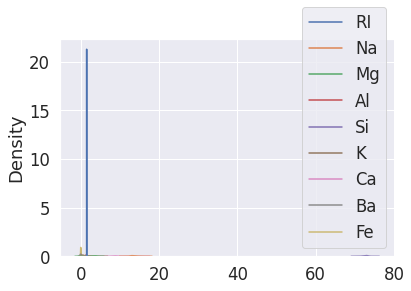

In [45]:
sns.kdeplot( data = glass_dataset.iloc[:,:-1])
plt.show()

By inspecting Boxplot representations:

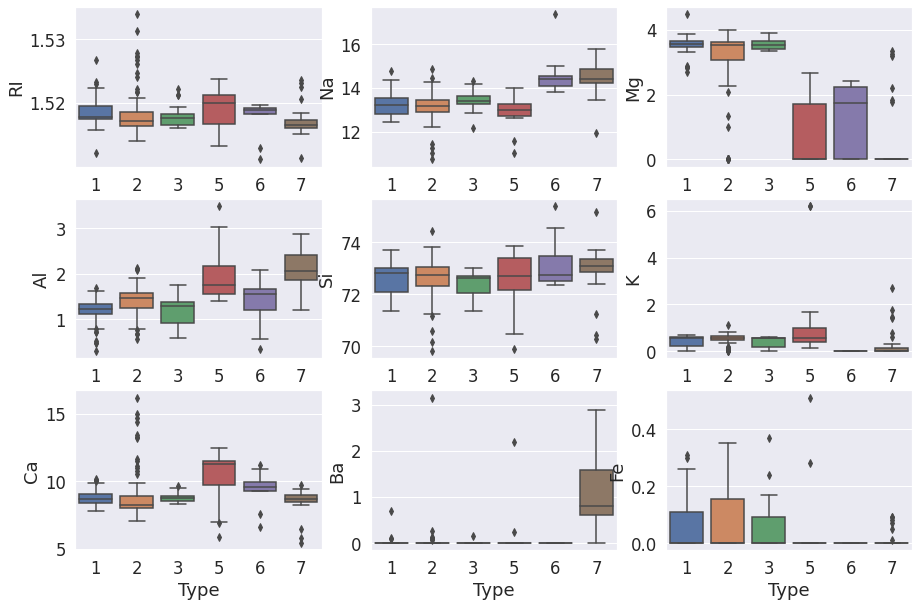

In [46]:
sns.set(style="darkgrid", font_scale=1.5)
plt.subplots(figsize = (15,10))
plt.subplot(3,3,1)
sns.boxplot(x='Type', y='RI', data=glass_dataset)
plt.subplot(3,3,2)
sns.boxplot(x='Type', y='Na', data=glass_dataset)
plt.subplot(3,3,3)
sns.boxplot(x='Type', y='Mg', data=glass_dataset)
plt.subplot(3,3,4)
sns.boxplot(x='Type', y='Al', data=glass_dataset)
plt.subplot(3,3,5)
sns.boxplot(x='Type', y='Si', data=glass_dataset)
plt.subplot(3,3,6)
sns.boxplot(x='Type', y='K', data=glass_dataset)
plt.subplot(3,3,7)
sns.boxplot(x='Type', y='Ca', data=glass_dataset)
plt.subplot(3,3,8)
sns.boxplot(x='Type', y='Ba', data=glass_dataset)
plt.subplot(3,3,9)
sns.boxplot(x='Type', y='Fe', data=glass_dataset)
plt.show()

1. At first sight, we don't see a clear relation which relates a chemical composition, or a combination of compositions and/or the index of ligt refraction with the type of glass, with the exception of type `7` which is clearly composed by barium.

2. There are a plethora of outliers. The Scale of `Si` is very different from the others. Maybe using a Scaler is a good idea.


### 2.2 Linear Correlation Analysis


<AxesSubplot:>

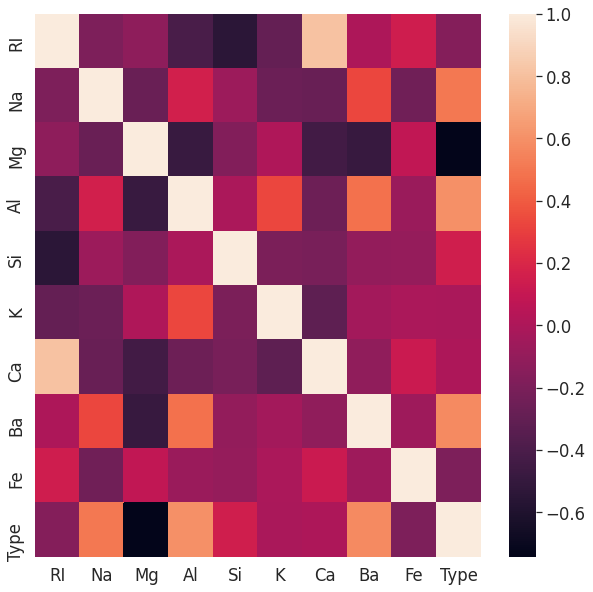

In [47]:
#Features Correlation Matrix 
corr = glass_dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr)

In [48]:
#Correlation between target and features
#This indicates us the importance of each features for the explanation of the target
glass_dataset.corr()['Type'].abs().sort_values(ascending= False)

Type    1.000000
Mg      0.744993
Al      0.598829
Ba      0.575161
Na      0.502898
Fe      0.188278
RI      0.164237
Si      0.151565
K       0.010054
Ca      0.000952
Name: Type, dtype: float64

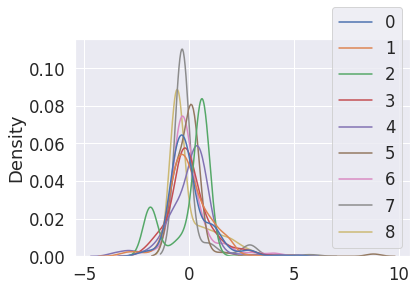

In [49]:
X = glass_dataset.iloc[:,:-1]
Standar_scaler = StandardScaler()
Xscaled = Standar_scaler.fit_transform(X)
sns.kdeplot( data= Xscaled)
plt.show()
# Far Better! We Well back to this point with the dataset previously splitted

### 2.3 Recursive Features Extraction

Create the RFE object and compute a cross-validated score.

In [50]:
# It is just a qualitative approach in order to choose the # of important features.
# Thus we does not split into two sets yet:
y = glass_dataset["Type"].values
RF = RandomForestClassifier()
rfecv = RFECV(estimator=RF, 
              step=1, 
              cv=StratifiedKFold(5, shuffle=True, random_state=202011), 
              scoring='accuracy')
rfecv.fit(Xscaled,y.ravel())

RFECV(cv=StratifiedKFold(n_splits=5, random_state=202011, shuffle=True),
      estimator=RandomForestClassifier(), scoring='accuracy')

In [51]:
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 8


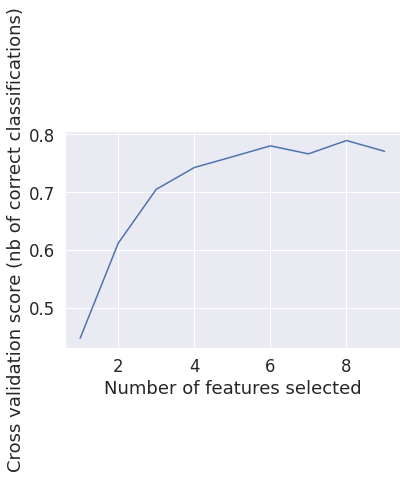

In [52]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

#### A Double Check Using Splitting and `RFE`

In [53]:
print(f"Cross-Validated Recursive Feature Extraction:\n")
print(f"Ranking of Importance: {rfecv.ranking_}")

Cross-Validated Recursive Feature Extraction:

Ranking of Importance: [1 1 1 1 1 1 1 1 2]


In [54]:
print(f"The Most Important Features: {X.columns[rfecv.support_].tolist()}")

The Most Important Features: ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba']


In [68]:
# Resetting Features
X = glass_dataset.iloc[:, :-1]
# Splitting
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size= 0.2,
                                                    random_state=202011)
X_train = Standar_scaler.fit_transform(X_train)
# Two Most Important Features To Extract
rfe = RFE(RF, n_features_to_select=8)
rfe = rfe.fit(X_train, Y_train.ravel() )

In [69]:
col_important_names = X.columns[rfe.support_].tolist()
print(f"Important Features: {col_important_names}")

Important Features: ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba']


In [70]:
print(f"KFold Validated Support: {rfecv.support_}")
print(f"TT    Split RFE Support: {rfe.support_}")

KFold Validated Support: [ True  True  True  True  True  True  True  True False]
TT    Split RFE Support: [ True  True  True  True  True  True  True  True False]


* After that we see that the two methods for extracting features are mutually consistent but we have to consider the majority of the features. 

* Combined with no significant improvements of the results across several candidates of ML models, we omit the analysis of a model with a reduced number of features.

* Moreover a PCA reduction is considered but after all we obtain similar results:
```
# The PCA
pca_red = PCA(n_components=5)
X = pca_red.fit_transform(X)
```

## **3** Model Fitting and Testing: All In


In [58]:
# Separating the response (y) and explanatory (x) variables
X = glass_dataset.iloc[:,:-1]
y = glass_dataset["Type"].values

In [59]:
# Splitting the dataset into test and training with 70% for training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = .2, 
                                                    random_state=202011, 
                                                    stratify = y) # We try to maintain proportions for the test set
# Scaling Correctly avoiding to filter information from test set to train set
X_train = Standar_scaler.fit_transform(X_train)
X_test = Standar_scaler.transform(X_test) # CTRL + ç

#Check whether the train and test have instances of all the glass types -> Testing Count
#datatest = pd. -> Comprobar que no se pierde el shape original en test
print(np.unique(y_train))
print(np.unique(y_test))

[1 2 3 5 6 7]
[1 2 3 5 6 7]


In [60]:
svmMod = SVC()
svmMod.fit(X_train,y_train)
y_pred = svmMod.predict(X_test)
sc1 = metrics.accuracy_score(y_pred,y_test)

# XGBoost CLassifier
xgbMod = XGBClassifier(max_depth = 3, n_estimators = 100, learning_rate = 0.05, random_state = 202011)
xgbMod.fit(X_train,y_train)
y_pred = xgbMod.predict(X_test)
sc2 = metrics.accuracy_score(y_pred,y_test)

# Random Forest
RF = RandomForestClassifier(max_features='auto',
                            n_jobs=-1, 
                            random_state=202011)

RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
sc3 = metrics.accuracy_score(y_pred,y_test)

In [61]:
# Compare accuracy of models
pd.DataFrame([['Support Vector Machine',sc1],
              ['XG Boost',sc2],
              ['Random Forest',sc3]],columns=['Model','Accuracy'])

,Model,Accuracy
0,Support Vector Machine,0.697674
1,XG Boost,0.767442
2,Random Forest,0.813953


### 3.1 Hyperparameters Tuning

After this preliminary search we try to tune the Random Forest by using the greedy  `GridSearchCV` algorithm:

In [62]:
params = { "criterion" : ["gini", "entropy"]
              , "min_samples_leaf" : [1, 2, 3, 4]
              , "min_samples_split" : [2, 3, 4, 5, 6]
              , "n_estimators": [100, 112, 125]
         }
GS = GridSearchCV(estimator=RF, 
                  param_grid=params, 
                  cv=5,
                  n_jobs=-1,
                  verbose=3)
GS= GS.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   25.4s finished


In [63]:
print(GS.best_score_)
print(GS.best_params_)

0.7835294117647059
{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 125}


In [64]:
y_pred = GS.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.87      0.93      0.90        14
           2       0.86      0.80      0.83        15
           3       0.50      0.67      0.57         3
           5       1.00      1.00      1.00         3
           6       1.00      0.50      0.67         2
           7       1.00      1.00      1.00         6

    accuracy                           0.86        43
   macro avg       0.87      0.82      0.83        43
weighted avg       0.87      0.86      0.86        43



In [75]:
#Checking Metrics Well-Behaved under an Unbalanced Problem
print(f"Balanced Accuracy Score: {100*metrics.balanced_accuracy_score(y_test, y_pred)}%")
print(f"F1-Micro: {100*metrics.f1_score(y_test, y_pred, average='weighted')}%")

Balanced Accuracy Score: 81.5873015873016%
F1-Micro: 86.07706113720549%


[[0.86666667 0.         0.25       0.         0.         0.        ]
 [0.13333333 0.85714286 0.25       0.         0.         0.        ]
 [0.         0.07142857 0.5        0.         0.         0.        ]
 [0.         0.         0.         1.         0.         0.        ]
 [0.         0.07142857 0.         0.         1.         0.        ]
 [0.         0.         0.         0.         0.         1.        ]]



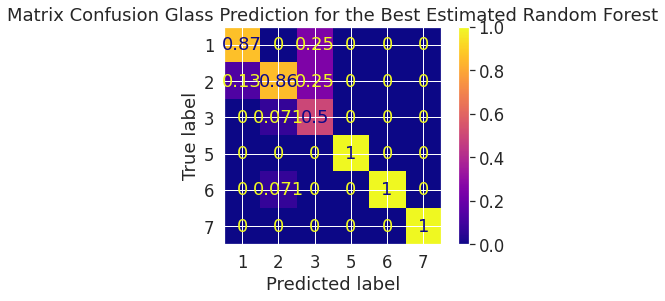

In [66]:
#Goodness-of-fit Metrics
disp = plot_confusion_matrix(GS, X_test, y_test,
                                 display_labels=np.unique(y_test),
                                 cmap='plasma',
                                 normalize='pred')
disp.ax_.set_title("Matrix Confusion Glass Prediction for the Best Estimated Random Forest")
print(disp.confusion_matrix)
print()

## **4** Summary and Conclusions:

After preprocessing the glass dataset and using a cross-validated features extraction strategy with the correct balanced K-Fold validation, we found that most of the features are retained and, for this reason, we decide to continue with all the nine features.

We have fitted three models for the classification of the glass dataset. Then we compare the corresponding metrics of a Support Vector Machine (SVM), the XGBoost Classifier and the Random Forest with no reduced number of features.

Then we choose the Random Forest for the Hyperparameters Tuning as we found that the behaviour in terms of the metrics is better than the others taken into account.

After that, equipped with best estimator model, we conclude by the inspection of the confusion matrix and other well-balanced metrics, that the Random Forest is a serious candidate for the correct classification of glass dataset.

## **5** Save the Framework with `Pickle`

Saving the best estimator of Random Forests on a `pickle` binary file:

In [ ]:
import pickle
# save
with open('Glass_Classifier_AI3Team.pkl','wb') as f:
    pickle.dump(GS.best_estimator_,f)

## **REMARK** 

The preprocessing of the data just involves the usual approach after _train-test split_ with the  `StandardScaler()` as we describe that features extractions and other preprocessing transformations are not suitable at all.Thus we omit because of redundancy the construction of a specific class.